# Titanic EDA Lab

### Having insights into your data can be the difference between sinking or swimming on a project. Here we'll dive into some Exploratory Data Analysis techniques on the iconic Titanic data set.


## Step 1: Reading the data

1. Go to [https://www.kaggle.com/c/titanic/data](https://www.kaggle.com/c/titanic/data)
2. If you scroll down the page a bit, you'll see a data dictionary explaining each of the columns. Take a minute to familiarize yourself with how the csv is structured.
3. Download the `train.csv` file into this project
4. Load the csv into pandas.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Step 2: Cleaning the data
Note: `NaN`, empty, and missing are synonymous.

2a) Create a bar chart showing how many missing values are in each column

In [4]:
missing = train.isnull().sum()
missing

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

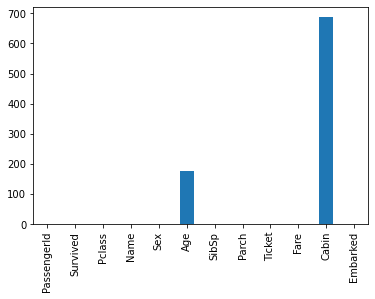

In [5]:
missing.plot(kind='bar')

2b) Which column has the most `NaN` values? How many cells in that column are empty?

2c) Delete all rows where `Embarked` is empty

In [6]:
train.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [7]:
train = train.dropna(subset=['Embarked'])
train.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

2d) Fill all empty cabins with **¯\\_(ツ)_/¯**

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
train['Cabin'] = train['Cabin'].fillna(value='¯\(ツ)/¯')

C:\Users\14792\AppData\Local\Temp/ipykernel_7004/902857104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Cabin'] = train['Cabin'].fillna(value='¯\(ツ)/¯')


In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S


## Step 3: Feature extraction
3a)  There are two columns that pertain to how many family members are on the boat for a given person. Create a new column called `FamilyCount` which will be the sum of those two columns.

In [11]:
train['FamilyCount'] = train['SibSp'] + train['Parch']
train

C:\Users\14792\AppData\Local\Temp/ipykernel_7004/2503133292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['FamilyCount'] = train['SibSp'] + train['Parch']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


3b) Reverends have a special title in their name. Create a column called `IsReverend`: 1 if they're a preacher, 0 if they're not.

In [12]:
def is_reverend(value):
    strings = value.split()
    if 'Rev.' in str(strings):
        return 1
    else:
        return 0

In [13]:
train['IsReverend'] = train['Name'].apply(is_reverend)

C:\Users\14792\AppData\Local\Temp/ipykernel_7004/2672129907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['IsReverend'] = train['Name'].apply(is_reverend)


In [14]:
train[train['IsReverend'] == 0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0


3c) In order to feed our training data into a classification algorithm, we need to convert our categories into 1's and 0's using `pd.get_dummies`
  1. Create 3 columns: `Embarked_C`, `Embarked_Q` and `Embarked_S`. These columns will have 1's and 0's that correspond to the `C`, `Q` and `S` values in the `Embarked` column
  

In [15]:
train['Embarked_C'] = pd.get_dummies(train['Embarked'])['C']
train['Embarked_Q'] = pd.get_dummies(train['Embarked'])['Q']
train['Embarked_S'] = pd.get_dummies(train['Embarked'])['S']
train

C:\Users\14792\AppData\Local\Temp/ipykernel_7004/1937849692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Embarked_C'] = pd.get_dummies(train['Embarked'])['C']
C:\Users\14792\AppData\Local\Temp/ipykernel_7004/1937849692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Embarked_Q'] = pd.get_dummies(train['Embarked'])['Q']
C:\Users\14792\AppData\Local\Temp/ipykernel_7004/1937849692.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,1,0,0


  2. Do the same thing for `Sex`
  

In [16]:
train[['Sex_F', 'Sex_M']] = pd.get_dummies(train['Sex'])
train

C:\Users\14792\AppData\Local\Temp/ipykernel_7004/4032803674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[['Sex_F', 'Sex_M']] = pd.get_dummies(train['Sex'])
C:\Users\14792\AppData\Local\Temp/ipykernel_7004/4032803674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[['Sex_F', 'Sex_M']] = pd.get_dummies(train['Sex'])


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_F,Sex_M
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,S,1,0,0,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,1,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,S,0,0,0,0,1,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,0,1,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,S,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,¯\(ツ)/¯,S,0,1,0,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0,0,0,1,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,¯\(ツ)/¯,S,3,0,0,0,1,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,0,1,0,0,0,1


  3. BONUS: Extract the title from everyone's name and create dummy columns

## Step 4: Exploratory analysis
4a) What was the survival rate overall?

In [17]:
train["Survived"].value_counts()

0    549
1    340
Name: Survived, dtype: int64

4b) Which gender fared the worst? What was their survival rate?

In [18]:
genderdeaths = train.groupby("Sex")
genderdeaths.mean()["Fare"]

Sex
female    44.252124
male      25.523893
Name: Fare, dtype: float64

In [19]:
#Male was the worst fared.

In [20]:
genderdeaths.Survived.mean()['male']


0.18890814558058924

In [21]:
#The male survival rate was 18.9%

4c) What was the survival rate for each `Pclass`?

In [22]:
Pclasssurvival = train.groupby('Pclass')

In [23]:
Pclasssurvival.Survived.mean()

Pclass
1    0.626168
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [24]:
#1st class survival rate: 62%
#2nd class survival rate: 47%
#3rd class survival rate: 24%

#I wonder who they ushered onto the life boats first... :/

4d) Did any reverends survive? How many?

In [25]:
revsurvival = train.groupby("IsReverend")
revsurvival.describe()

PassengerId                                                       \
                 count        mean         std    min     25%    50%    75%   
IsReverend                                                                    
0                883.0  445.730464  256.542301    1.0  224.50  446.0  667.5   
1                  6.0  485.666667  344.461125  150.0  175.75  438.5  793.5   

                  Survived            ... Sex_F       Sex_M            \
              max    count      mean  ...   75%  max  count      mean   
IsReverend                            ...                               
0           891.0    883.0  0.385051  ...   1.0  1.0  883.0  0.646659   
1           887.0      6.0  0.000000  ...   0.0  0.0    6.0  1.000000   

                                               
                 std  min  25%  50%  75%  max  
IsReverend                                     
0           0.478278  0.0  0.0  1.0  1.0  1.0  
1           0.000000  1.0  1.0  1.0  1.0  1.0  

[2 rows x 104 columns]

In [26]:
# 6 reverends onboard, none survived

4e) What is the survival rate for cabins marked **¯\\_(ツ)_/¯**

In [27]:
cabinsurvival = train.groupby("Cabin")
cabinsurvival.Survived.mean()

Cabin
A10        0.000000
A14        0.000000
A16        1.000000
A19        0.000000
A20        1.000000
             ...   
F38        0.000000
F4         1.000000
G6         0.500000
T          0.000000
¯\(ツ)/¯    0.299854
Name: Survived, Length: 147, dtype: float64

In [28]:
# The survival rate for cabins marked  ¯\(ツ)/¯ was 29.9%

4f) What is the survival rate for people whose `Age` is empty?

In [29]:
train.loc[train["Age"].isnull()]["Survived"].mean()

0.2937853107344633

In [30]:
# 29%

4g) What is the survival rate for each port of embarkation?

In [31]:
port = train.groupby("Embarked")

In [32]:
port.Survived.mean()

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

In [33]:
# C = Cherbourg, Q = Queenstown, S = Southampton
# Cherbourg survival rate: 55%
# Queenstown survival rate: 38.9%
# Southampton survival rate: 33%

4h) What is the survival rate for children (under 12) in each `Pclass`?

In [34]:
child = train["Age"] < 12
children = train.loc[child, :]
class_child = children.groupby("Pclass")
class_child.Survived.mean()

Pclass
1    0.750000
2    1.000000
3    0.404255
Name: Survived, dtype: float64

In [35]:
# Children under 12 survival rate by class: 
# First class: 75%
# Second class: 100% 
# Third class: 40%

4i) Did the captain of the ship survive? Is he on the list?

In [36]:
# No idea, couldn't find his title on the list.

4j) Of all the people that died, who had the most expensive ticket? How much did it cost?

In [37]:
rich_fella = train['Survived'] == 0
goldenticket = train[rich_fella][['Pclass','Name','Sex','Age','Fare']].sort_values(by = 'Fare', ascending = False)
goldenticket.head(2)

,Pclass,Name,Sex,Age,Fare
27,1,"Fortune, Mr. Charles Alexander",male,19.0,263.0
438,1,"Fortune, Mr. Mark",male,64.0,263.0


In [38]:
# Mr. Charles Alexander Fortune and (I'm assuming Father) Mr. Mark Fortune both paid $263.00 for their tickets to 'Paradise'.

4k) Does having family on the boat help or hurt your chances of survival?

In [39]:
fam = train.sort_values(by='FamilyCount', ascending=False)
fam.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,Embarked_C,Embarked_Q,Embarked_S,Sex_F,Sex_M
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,¯\(ツ)/¯,S,10,0,0,0,1,0,1
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,¯\(ツ)/¯,S,10,0,0,0,1,1,0
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,¯\(ツ)/¯,S,10,0,0,0,1,0,1
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,¯\(ツ)/¯,S,10,0,0,0,1,0,1
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,¯\(ツ)/¯,S,10,0,0,0,1,1,0


## Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.

*Note: Answers may vary*


Text(0.5, 0, 'Sex')

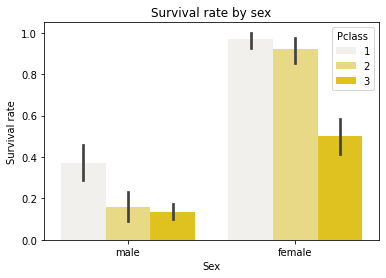

In [40]:
survive_class= sns.barplot(x='Sex', y='Survived', hue='Pclass', color='gold', data=train)
survive_class.set_title('Survival rate by sex')
survive_class.set_ylabel('Survival rate')
survive_class.set_xlabel('Sex')